In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
df = pd.read_json(
    "../npm-malpack/malicious_packages.json",
    convert_dates=["created", "updated", "deleted"]
)

df.iloc[0]

id                                                                  1513
created                                 2020-04-10 14:11:45.993000+00:00
updated                                 2020-04-10 14:11:45.993000+00:00
deleted                                                              NaT
title                                               Malicious 󠅮󠅰󠅭Package
found_by               {'link': '', 'name': 'Microsoft Vulnerability ...
reported_by            {'link': '', 'name': 'Microsoft Vulnerability ...
module_name                                                   m-backdoor
cves                                                                  []
vulnerable_versions                                              >=0.0.0
patched_versions                                                  <0.0.0
overview               All versions of `m-backdoor` contain malicious...
recommendation                      Remove the package from your system.
references                                         

In [4]:
# Strip timezone information
df["created"] = df["created"].dt.tz_localize(None)
df["updated"] = df["updated"].dt.tz_localize(None)
df.index = df.set_index('created').index.astype('datetime64[ns]')
df.dtypes

id                              int64
created                datetime64[ns]
updated                datetime64[ns]
deleted                datetime64[ns]
title                          object
found_by                       object
reported_by                    object
module_name                    object
cves                           object
vulnerable_versions            object
patched_versions               object
overview                       object
recommendation                 object
references                     object
access                         object
severity                       object
cwe                            object
formatted                      object
dtype: object

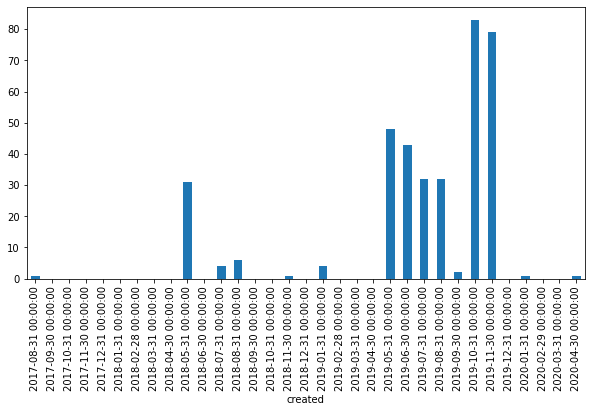

In [5]:
ax = frequencies = df["created"].groupby(pd.Grouper(freq="M")).count().plot(kind="bar")

In [7]:
df["created"].groupby(pd.Grouper(freq="M")).count()

created
2017-08-31     1
2017-09-30     0
2017-10-31     0
2017-11-30     0
2017-12-31     0
2018-01-31     0
2018-02-28     0
2018-03-31     0
2018-04-30     0
2018-05-31    31
2018-06-30     0
2018-07-31     4
2018-08-31     6
2018-09-30     0
2018-10-31     0
2018-11-30     1
2018-12-31     0
2019-01-31     4
2019-02-28     0
2019-03-31     0
2019-04-30     0
2019-05-31    48
2019-06-30    43
2019-07-31    32
2019-08-31    32
2019-09-30     2
2019-10-31    83
2019-11-30    79
2019-12-31     0
2020-01-31     1
2020-02-29     0
2020-03-31     0
2020-04-30     1
Freq: M, Name: created, dtype: int64

In [66]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib

In [24]:
counts = list(df["created"].groupby(pd.Grouper(freq="M")).count())

2017-08-07 18:25:16.285000
2020-04-10 14:11:45.993000
['2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04']


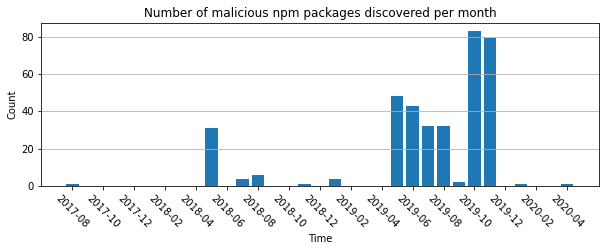

In [70]:
print(min(df['created']))
print(max(df['created']))
matplotlib.rcParams['figure.figsize'] = [10, 3]
month_range = pd.date_range('2017-07-07', '2020-04-30', freq='MS').strftime("%Y-%m").tolist()
print(month_range)
plt.bar(month_range, counts)
plt.xticks(month_range[::2], rotation=315)
plt.grid(b=True, axis='y', which='both')
plt.title("Number of malicious npm packages discovered per month")
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()